In [171]:
from pyspark.sql import SparkSession, Window, functions as F
import pandas as pd
import numpy as np
import seaborn as sns
import math

# Create a spark session
spark = (
    SparkSession.builder.appName("BNPL Project")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.driver.memory", "8g")
    .config("spark.driver.executor", "8g")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .getOrCreate()
)

p = lambda x,type : f'../../data/{type}/{x}'

sdf = spark.read.parquet(p('process_data.parquet', 'curated'), header=True)
consumer = pd.read_csv(p('consumer_fraud_probability.csv', 'tables'))
merchant = pd.read_csv(p('merchant_fraud_probability.csv', 'tables'))

consumer['fraud_probability'] = consumer['fraud_probability'] / 100
merchant['fraud_probability'] = merchant['fraud_probability'] / 100

# merchant['order_datetime'] = pd.to_datetime(merchant['order_datetime'])
# consumer['order_datetime'] = pd.to_datetime(consumer['order_datetime'])

In [172]:
m = 31334588839

<AxesSubplot:>

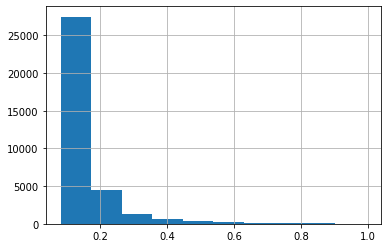

In [173]:
consumer['fraud_probability'].hist()

<AxesSubplot:>

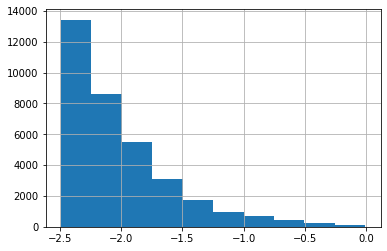

In [174]:
consumer['fraud_probability'].map(math.log).hist()

In [175]:
consumer['fraud_log_prob'] = consumer['fraud_probability'].map(math.log)

In [176]:
consumer['log_prob_bin'] = pd.cut(consumer['fraud_log_prob'], 10)
consumer

,user_id,order_datetime,fraud_probability,fraud_log_prob,log_prob_bin
0,6228,2021-12-19,0.976298,-0.023987,"(-0.256, -0.00755]"
1,21419,2021-12-10,0.992474,-0.007555,"(-0.256, -0.00755]"
2,5606,2021-10-17,0.840583,-0.173660,"(-0.256, -0.00755]"
3,3101,2021-04-17,0.914219,-0.089685,"(-0.256, -0.00755]"
4,22239,2021-10-19,0.947034,-0.054420,"(-0.256, -0.00755]"
...,...,...,...,...,...
34859,18466,2022-02-22,0.086799,-2.444163,"(-2.493, -2.242]"
34860,17552,2021-12-26,0.083495,-2.482973,"(-2.493, -2.242]"
34861,17875,2021-06-27,0.082888,-2.490259,"(-2.493, -2.242]"
34862,10401,2021-09-18,0.088422,-2.425633,"(-2.493, -2.242]"


In [187]:
y = consumer.groupby('log_prob_bin').count()['fraud_log_prob'].to_list()
x = range(10)

22/10/05 13:08:44 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 5027915 ms exceeds timeout 120000 ms
22/10/05 13:08:44 WARN SparkContext: Killing executors is not supported by current scheduler.
